In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn import under_sampling, over_sampling
import math

def get_file_using_PublicURL(public_url):
  file_id_url = public_url.split('/')[-2]
  return 'https://drive.google.com/uc?id=' + file_id_url
data = get_file_using_PublicURL('https://drive.google.com/file/d/1S3Prb6z5hb-xKvaIVq4-MbT-HsfNo1cT/view?usp=sharing')

In [ ]:
df = pd.read_csv(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          21000 non-null  int64
 1   LIMIT_BAL                   21000 non-null  int64
 2   SEX                         21000 non-null  int64
 3   EDUCATION                   21000 non-null  int64
 4   MARRIAGE                    21000 non-null  int64
 5   AGE                         21000 non-null  int64
 6   PAY_0                       21000 non-null  int64
 7   PAY_2                       21000 non-null  int64
 8   PAY_3                       21000 non-null  int64
 9   PAY_4                       21000 non-null  int64
 10  PAY_5                       21000 non-null  int64
 11  PAY_6                       21000 non-null  int64
 12  BILL_AMT1                   21000 non-null  int64
 13  BILL_AMT2                   21000 non-null  int64
 14  BILL_A

In [ ]:
df = df.rename(columns={'PAY_0':'PAY_1'})
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,25150,360000,2,2,2,25,-1,-1,-1,-1,...,3435,8870,2020,12590,3479,3446,8870,2020,27043,0
1,13470,240000,2,1,2,46,2,2,-2,-1,...,2240,1681,2267,0,0,2240,0,2267,3074,0
2,3092,320000,2,2,1,41,0,0,0,0,...,35409,35036,35939,5000,2000,2000,3000,3000,1500,0
3,13973,50000,2,2,2,24,-1,-1,-2,-2,...,0,0,0,0,0,0,0,0,0,1
4,10567,80000,1,3,1,52,-1,0,0,0,...,20561,21261,21457,1500,1500,1500,1028,876,1449,0


# **Data Cleansing**

### **Handling Missing Data**

In [ ]:
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default_payment_next_month    0
dtype: int64

Data tidak memiliki missing value

### **Handling Duplicated Data**

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.duplicated(subset = ['ID','SEX','EDUCATION','MARRIAGE']).sum()

0

In [ ]:
df.duplicated(subset = 'ID').sum()

0

Data tidak ada yang duplicate

In [ ]:
# pengelompokan kolom berdasarkan jenisnya
nums = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6','PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
cats = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6', 'default_payment_next_month']
kategori = df[cats].astype(str)
kategori

,SEX,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default_payment_next_month
0,2,2,2,-1,-1,-1,-1,-1,-1,0
1,2,1,2,2,2,-2,-1,0,-1,0
2,2,2,1,0,0,0,0,0,0,0
3,2,2,2,-1,-1,-2,-2,-2,-2,1
4,1,3,1,-1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
20995,2,2,2,1,-2,-2,-2,-2,-2,0
20996,2,2,1,0,0,0,0,0,0,0
20997,1,1,1,1,2,2,2,0,0,1
20998,2,2,1,0,0,0,0,0,0,0


In [ ]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.00000,21000.000000,21000.000000,21000.00000,...,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,14949.183667,167214.746667,1.607571,1.854190,1.551714,35.461619,-0.01119,-0.127238,-0.164857,-0.21819,...,43387.372476,40398.551095,38931.194000,5686.349333,5.923003e+03,5202.325333,4793.172000,4797.012952,5211.736762,0.221190
std,8632.775153,128965.188482,0.488303,0.791628,0.521176,9.206628,1.12321,1.198957,1.198624,1.17221,...,64081.073110,60396.811177,59196.499234,16868.075695,2.390953e+04,17006.416467,15467.403159,15270.031988,17698.795697,0.415058
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.00000,-2.000000,-2.000000,-2.00000,...,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7508.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.00000,-1.000000,-1.000000,-1.00000,...,2332.000000,1759.000000,1242.750000,998.250000,8.360000e+02,390.000000,284.000000,241.000000,102.000000,0.000000
50%,14939.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.00000,0.000000,0.000000,0.00000,...,19158.500000,18266.500000,17203.500000,2100.000000,2.011000e+03,1811.500000,1500.000000,1500.000000,1500.000000,0.000000
75%,22386.750000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.00000,0.000000,0.000000,0.00000,...,55376.750000,50517.250000,49463.000000,5023.250000,5.000000e+03,4500.000000,4002.250000,4051.000000,4000.000000,0.000000
max,29998.000000,800000.000000,2.000000,6.000000,3.000000,75.000000,8.00000,8.000000,8.000000,8.00000,...,706864.000000,587067.000000,699944.000000,873552.000000,1.684259e+06,889043.000000,621000.000000,417990.000000,528666.000000,1.000000


## **Feature Extraction**
**Creating new features**
1.   **AGE_group**
2.   **Membership**
3.   **Minimum amount setiap periode**
4.   **Pending amount setiap periode**

In [ ]:
df['AGE_group'] = np.where(df.AGE < 25, 'Muda', np.where(df.AGE < 50, 'Dewasa', np.where(df.AGE < 60, 'Pensiun', 'Lansia' ) ) )
df['Membership'] = np.where(df.LIMIT_BAL < df.LIMIT_BAL.quantile(.5), 'Silver', np.where(df.LIMIT_BAL < df.LIMIT_BAL.quantile(.75), 'Gold', 'Platinum' ) )
df[['LIMIT_BAL','Membership','AGE','AGE_group']]

,LIMIT_BAL,Membership,AGE,AGE_group
0,360000,Platinum,25,Dewasa
1,240000,Platinum,46,Dewasa
2,320000,Platinum,41,Dewasa
3,50000,Silver,24,Muda
4,80000,Silver,52,Pensiun
...,...,...,...,...
20995,50000,Silver,31,Dewasa
20996,80000,Silver,37,Dewasa
20997,100000,Silver,52,Pensiun
20998,90000,Silver,47,Dewasa


### Age Group

In [ ]:
df['AGE_group'].value_counts()

Dewasa     17275
Muda        1874
Pensiun     1612
Lansia       239
Name: AGE_group, dtype: int64

Customer di dominasi dengan kategori dewasa (26-59 tahun)

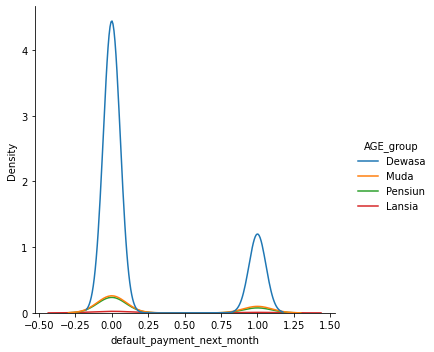

In [ ]:
sns.displot(data=df, x='default_payment_next_month', kind='kde', hue='AGE_group')

In [ ]:
df.groupby(['AGE_group']).agg(default_rate=('default_payment_next_month','mean')).reset_index().sort_values('default_rate',ascending = False)

,AGE_group,default_rate
2,Muda,0.275880
1,Lansia,0.251046
3,Pensiun,0.243797
0,Dewasa,0.212735


In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month', 'AGE_group', 'Membership'],
      dtype='object')

### Membership

In [ ]:
df['Membership'].value_counts()

Silver      10194
Gold         5428
Platinum     5378
Name: Membership, dtype: int64

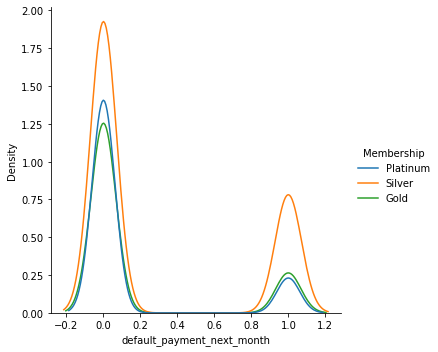

In [ ]:
sns.displot(data=df, x='default_payment_next_month', kind='kde', hue='Membership')

In [ ]:
df.groupby(['Membership']).agg(default_rate=('default_payment_next_month','mean')).reset_index().sort_values('default_rate',ascending = False)

,Membership,default_rate
2,Silver,0.288601
0,Gold,0.174097
1,Platinum,0.140945


### Minimum amount dan pending amount setiap periode

Asumsi bahwa kartu kredit dapat terus dipakai bila nasabah membayar minimal 10% tagihan setiap bulannya

In [ ]:
df['MIN_AMT6']=df['BILL_AMT6']*0.1
df['PENDING_AMT6']= df['BILL_AMT6'] - df['PAY_AMT6']

df['MIN_AMT5']=df['PENDING_AMT6']*0.1
df['PENDING_AMT5'] = (df['BILL_AMT5']+ df['BILL_AMT6']) - (df['PAY_AMT5']+df['PAY_AMT6'])

df['MIN_AMT4']=df['PENDING_AMT5']*0.1
df['PENDING_AMT4'] = (df['BILL_AMT4']+df['BILL_AMT5']+df['BILL_AMT6']) - (df['PAY_AMT4']+df['PAY_AMT5']+df['PAY_AMT6'])

df['MIN_AMT3']=df['PENDING_AMT4']*0.1
df['PENDING_AMT3'] = (df['BILL_AMT3']+ df['BILL_AMT4']+ df['BILL_AMT5']+ df['BILL_AMT6']) - (df['PAY_AMT3']+ df['PAY_AMT4']+ df['PAY_AMT5']+ df['PAY_AMT6'])

df['MIN_AMT2']=df['PENDING_AMT3']*0.1
df['PENDING_AMT2'] = (df['BILL_AMT2']+df['BILL_AMT3']+df['BILL_AMT4']+df['BILL_AMT5']+df['BILL_AMT6']) - (df['PAY_AMT2']+df['PAY_AMT3']+df['PAY_AMT4']+df['PAY_AMT5']+df['PAY_AMT6'])

df['MIN_AMT1']=df['PENDING_AMT2']*0.1
df['PENDING_AMT1'] = (df['BILL_AMT1']+df['BILL_AMT2']+df['BILL_AMT3']+df['BILL_AMT4']+df['BILL_AMT5']+df['BILL_AMT6']) - (df['PAY_AMT1']+df['PAY_AMT2']+df['PAY_AMT3']+df['PAY_AMT4']+df['PAY_AMT5']+df['PAY_AMT6'])

min_dan_pending = ['MIN_AMT1','MIN_AMT2','MIN_AMT3','MIN_AMT4','MIN_AMT5','MIN_AMT6',
                   'PENDING_AMT1','PENDING_AMT2','PENDING_AMT3','PENDING_AMT4','PENDING_AMT5','PENDING_AMT6']

df[min_dan_pending]

,MIN_AMT1,MIN_AMT2,MIN_AMT3,MIN_AMT4,MIN_AMT5,MIN_AMT6,PENDING_AMT1,PENDING_AMT2,PENDING_AMT3,PENDING_AMT4,PENDING_AMT5,PENDING_AMT6
0,-1446.4,-2357.5,-2360.8,-1817.3,-2502.3,202.0,-6102,-14464,-23575,-23608,-18173,-25023
1,-139.3,-139.3,84.7,-139.3,-80.7,226.7,-937,-1393,-1393,847,-1393,-807
2,18741.2,13560.1,9888.4,6647.5,3443.9,3593.9,232258,187412,135601,98884,66475,34439
3,0.0,0.0,0.0,0.0,0.0,0.0,2675,0,0,0,0,0
4,9483.2,7781.1,5992.6,4039.3,2000.8,2145.7,129193,94832,77811,59926,40393,20008
...,...,...,...,...,...,...,...,...,...,...,...,...
20995,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0
20996,24842.4,17822.7,13603.2,9457.4,4789.5,4989.5,313191,248424,178227,136032,94574,47895
20997,11603.5,9875.8,7463.6,5719.6,3135.3,3135.3,137544,116035,98758,74636,57196,31353
20998,13494.1,10822.3,8137.6,5462.9,2745.2,2945.2,161418,134941,108223,81376,54629,27452


In [ ]:
df[(df['PAY_1'] == -2) & (df['PAY_2'] == -2 ) & (df['PAY_3'] == -2  )& (df['PAY_4'] == -2 )& (df['PAY_5'] == -2 )& (df['PAY_6'] == -2 )][['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6',
                                                    'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','MIN_AMT1','MIN_AMT2','MIN_AMT3','MIN_AMT4','MIN_AMT5','MIN_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,...,MIN_AMT3,MIN_AMT4,MIN_AMT5,MIN_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
18,-2,-2,-2,-2,-2,-2,-8,2046,0,409,...,-17.1,29.2,95.9,153.9,2054,0,409,872,1539,580
50,-2,-2,-2,-2,-2,-2,8800,0,5738,0,...,-3000.0,-2775.6,3600.0,6600.0,0,5738,1626,2244,66000,30000
52,-2,-2,-2,-2,-2,-2,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
64,-2,-2,-2,-2,-2,-2,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
80,-2,-2,-2,-2,-2,-2,2793,1356,19497,10164,...,816.5,-91.0,2621.8,2621.8,1356,19497,10173,1089,28217,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20942,-2,-2,-2,-2,-2,-2,-200,-200,0,2115,...,211.5,0.0,0.0,0.0,0,200,2115,0,0,0
20961,-2,-2,-2,-2,-2,-2,0,0,0,0,...,-52.0,-52.0,-52.0,0.0,0,0,0,0,0,520
20976,-2,-2,-2,-2,-2,-2,4439,3487,7491,2310,...,231.0,1200.0,0.0,0.0,3913,7494,2310,12000,0,0
20977,-2,-2,-2,-2,-2,-2,0,698,4949,967,...,95.4,576.2,0.0,0.0,698,4949,967,5775,0,0


In [ ]:
df[(df['PAY_1'] == 0)& (df['PAY_2'] == 0 )&(df['PAY_3'] == 0  )& (df['PAY_4'] == 0 )& (df['PAY_5'] == 0 )& (df['PAY_6'] == 0 )][['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6',
                                                    'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','MIN_AMT1','MIN_AMT2','MIN_AMT3','MIN_AMT4','MIN_AMT5','MIN_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].sort_values('MIN_AMT1',ascending = False)

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,...,MIN_AMT3,MIN_AMT4,MIN_AMT5,MIN_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
394,0,0,0,0,0,0,580928,597793,597415,569034,...,162377.5,107434.0,54863.8,56863.8,25624,21898,20851,19599,26000,20000
13040,0,0,0,0,0,0,653062,671563,689627,706864,...,135466.5,66280.1,29464.1,29464.1,28500,30500,30000,15000,15000,0
9877,0,0,0,0,0,0,568532,577681,577015,565669,...,151233.0,96666.1,45984.6,47684.6,22000,23000,21300,20000,17500,17000
3519,0,0,0,0,0,0,562326,532374,537543,541019,...,142961.7,90660.1,45803.0,47803.4,20010,25022,21003,18003,20000,20004
8361,0,0,0,0,0,0,626648,586825,547667,504474,...,134200.1,85316.1,40545.4,42058.5,20659,20421,16943,15634,14933,15131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,0,0,0,0,0,0,28765,24672,23095,20776,...,-5225.3,-7300.8,-7868.5,239.6,1714,2012,1107,21,512,81081
12797,0,0,0,0,0,0,8927,9124,10220,12044,...,-1085.8,209.8,-1774.9,825.1,8000,10000,10016,25000,8000,26000
7282,0,0,0,0,0,0,24874,19500,11717,7540,...,-7493.6,-7747.6,-8430.4,611.3,2000,2000,3540,5000,3113,90417
17904,0,0,0,0,0,0,7351,6225,3645,3090,...,-8342.3,-8551.3,-8921.3,119.0,3039,2000,1000,1000,0,90403


## **Feature encoding**

In [ ]:
mapping_age = { 'Muda' : 0,
                'Dewasa' : 1,
                'Pensiun' : 2,
                'Lansia' : 3
               }
df['kelompok_usia'] = df['AGE_group'].map(mapping_age)

mapping_membership = {'Silver' : 0,
                      'Gold' : 1,
                      'Platinum' : 2
                      }
df['membership_group'] = df['Membership'].map(mapping_membership)
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month', 'AGE_group', 'Membership', 'MIN_AMT6',
       'PENDING_AMT6', 'MIN_AMT5', 'PENDING_AMT5', 'MIN_AMT4', 'PENDING_AMT4',
       'MIN_AMT3', 'PENDING_AMT3', 'MIN_AMT2', 'PENDING_AMT2', 'MIN_AMT1',
       'PENDING_AMT1', 'kelompok_usia', 'membership_group'],
      dtype='object')

In [ ]:
true_numeric_columns = ['LIMIT_BAL', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
                        'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
                        'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
                        'MIN_AMT6', 'PENDING_AMT6', 'MIN_AMT5', 'PENDING_AMT5', 'MIN_AMT4', 'PENDING_AMT4',
                        'MIN_AMT3', 'PENDING_AMT3', 'MIN_AMT2', 'PENDING_AMT2', 'MIN_AMT1',
                        'PENDING_AMT1']

x = df[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'MIN_AMT6', 'PENDING_AMT6', 'MIN_AMT5', 'PENDING_AMT5', 'MIN_AMT4', 'PENDING_AMT4',
       'MIN_AMT3', 'PENDING_AMT3', 'MIN_AMT2', 'PENDING_AMT2', 'MIN_AMT1',
       'PENDING_AMT1', 'kelompok_usia', 'membership_group']]
y = df[['default_payment_next_month']]

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=42)

In [ ]:
df.shape

(21000, 41)

In [ ]:
x.kelompok_usia.value_counts()

1    17275
0     1874
2     1612
3      239
Name: kelompok_usia, dtype: int64

In [ ]:
xtrain.shape, xtest.shape

((16800, 37), (4200, 37))

In [ ]:
xtrain.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,MIN_AMT4,PENDING_AMT4,MIN_AMT3,PENDING_AMT3,MIN_AMT2,PENDING_AMT2,MIN_AMT1,PENDING_AMT1,kelompok_usia,membership_group
15345,100000,2,1,2,30,1,-2,-2,-2,-2,...,0.0,0,0.0,0,0.0,0,0.0,0,1,0
8476,200000,1,2,1,30,1,-2,-2,-2,-2,...,-42.0,-420,-42.0,-420,-42.0,-420,-42.0,-420,1,1
9052,410000,2,1,2,31,0,0,0,0,0,...,22687.0,348574,34857.4,452456,45245.6,570183,57018.3,689252,1,2
17206,180000,2,2,1,41,-1,-1,-1,-1,-1,...,275.6,-2476,-247.6,3642,364.2,6152,615.2,-1566,1,1
16188,80000,1,2,2,42,1,4,3,2,0,...,9816.4,128791,12879.1,216592,21659.2,310945,31094.5,408786,1,0


In [ ]:
ytrain.head()

,default_payment_next_month
15345,0
8476,0
9052,0
17206,0
16188,0


In [ ]:
xtest.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,MIN_AMT4,PENDING_AMT4,MIN_AMT3,PENDING_AMT3,MIN_AMT2,PENDING_AMT2,MIN_AMT1,PENDING_AMT1,kelompok_usia,membership_group
2312,80000,1,1,2,26,0,0,0,0,0,...,10350.9,162116,16211.6,227513,22751.3,297226,29722.6,378092,1,0
16845,60000,2,2,1,35,0,0,0,0,0,...,7556.4,113176,11317.6,166529,16652.9,225349,22534.9,283554,1,0
6105,80000,2,5,2,25,0,0,0,0,0,...,6187.3,101730,10173.0,173692,17369.2,243796,24379.6,313327,1,0
18082,20000,1,3,1,27,0,0,2,0,0,...,3891.3,57787,5778.7,77157,7715.7,97857,9785.7,115091,1,0
11335,500000,2,1,1,43,-2,-2,-2,-2,-2,...,297.8,11857,1185.7,-2296,-229.6,7094,709.4,-2119,1,2


In [ ]:
ytest.head()

,default_payment_next_month
2312,0
16845,0
6105,0
18082,1
11335,0


In [ ]:
ytest.value_counts(normalize=True)

default_payment_next_month
0                             0.770714
1                             0.229286
dtype: float64

In [ ]:
ytrain.value_counts(normalize=True)

default_payment_next_month
0                             0.780833
1                             0.219167
dtype: float64

In [ ]:
def plot_me(df, all_columns, figsize=(30, 15)):
  plt.figure(figsize=figsize)
  for col_name, index in zip(all_columns, range(len(all_columns))):
      plt.subplot( math.ceil(len(all_columns)/6)  , 6, index+1)
      sns.kdeplot(x=df[col_name], color='green', linewidth=3, fill=True)
      plt.xlabel(col_name)
  plt.show()

def get_minmax_scaler(df, columns):
  scaler = {}
  for col in columns:
    scaler[col] = MinMaxScaler().fit( np.array(df[col]).reshape(-1,1) )
  return scaler

def get_standard_scaler(df, columns):
  scaler = {}
  for col in columns:
    scaler[col] = StandardScaler().fit( np.array(df[col]).reshape(-1,1) )
  return scaler

def apply_transform(scaler, df):
  temp_df = df.copy()
  for col in scaler.keys():
    temp_df[col] = scaler[col].transform( np.array(df[col]).reshape(-1,1) )
  return temp_df

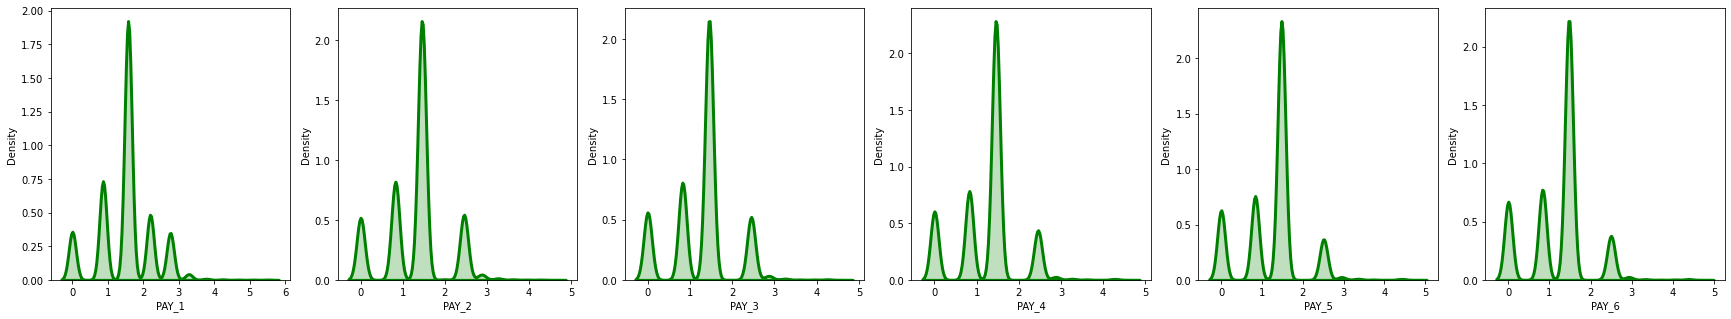

In [ ]:
col_pay = ['PAY_'+str(i) for i in range(1,7)]
temp_pay = df[col_pay].copy()

for i in temp_pay.columns:
  temp_pay[i] = temp_pay[i]+3

for i in temp_pay.columns:
  temp_pay[i],_ = stats.boxcox(temp_pay[i])

plot_me(temp_pay, temp_pay.columns, figsize=(30,5))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_classification(model, xtrain, ytrain, xtest, ytest):
    ypred_datatest = model.predict(xtest)
    ypred_datatrain = model.predict(xtrain)
    
    y_pred_proba_test = model.predict_proba(xtest)
    y_pred_proba_train = model.predict_proba(xtrain)
    
    # print("\nAccuracy (Test Set): %.2f" % accuracy_score(ytest, ypred_datatest))
    
    print("\nPrecision (Test Set): %.2f" % precision_score(ytest, ypred_datatest))
    # print("Precision (Train Set): %.2f" % precision_score(ytrain, ypred_datatrain))
    
    print("\nRecall (Test Set): %.2f" % recall_score(ytest, ypred_datatest))
    # print("Recall (Train Set): %.2f" % recall_score(ytrain, ypred_datatrain))
    
    print("\nF1-Score (Test Set): %.2f" % f1_score(ytest, ypred_datatest))
    # print("F1-Score (Train Set): %.2f" % f1_score(ytrain, ypred))
    
    print("\nAUC (test-proba): %.2f" % roc_auc_score(ytest, y_pred_proba_test[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(ytrain, y_pred_proba_train[:, 1]))

# **DECISION TREE**

**Skenario 1 - Tanpa Pre-processing**

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(xtrain, ytrain)

# y_pred = dt_model.predict(xtest)
eval_classification(dt_model, xtrain, ytrain, xtest, ytest)


Precision (Test Set): 0.39

Recall (Test Set): 0.41

F1-Score (Test Set): 0.40

AUC (test-proba): 0.61
AUC (train-proba): 1.00


**Skenario 2 - Handling Imbalance pada Data Training dengan SMOTE**

In [ ]:
X_train_balance, y_train_balance = xtrain.copy(), ytrain.copy()
X_train_balance, y_train_balance  = over_sampling.SMOTE(sampling_strategy=1.0).fit_resample(X_train_balance, y_train_balance)

dt_model.fit(X_train_balance, y_train_balance )
eval_classification(dt_model, X_train_balance, y_train_balance, xtest, ytest)


Precision (Test Set): 0.37

Recall (Test Set): 0.46

F1-Score (Test Set): 0.41

AUC (test-proba): 0.61
AUC (train-proba): 1.00


**Skenario 3 - Do MinMax Scaling to Data**

In [ ]:
X_train_minmax, X_test = xtrain.copy(), xtest.copy()
X_scaler_minmax = get_minmax_scaler(X_train_minmax, X_train_minmax.columns)
X_train_minmax, X_test_minmax = apply_transform(X_scaler_minmax, X_train_minmax), apply_transform(X_scaler_minmax, X_test)

dt_model.fit(X_train_minmax, ytrain )
eval_classification(dt_model, X_train_minmax, ytrain, X_test_minmax, ytest)


Precision (Test Set): 0.39

Recall (Test Set): 0.41

F1-Score (Test Set): 0.40

AUC (test-proba): 0.61
AUC (train-proba): 1.00


**Skenario 4 - Do Standard Scaling to Data**

In [ ]:
X_train_std = xtrain.copy()
X_scaler_std = get_standard_scaler(X_train_std, X_train_std.columns)
X_train_std, X_test_std = apply_transform(X_scaler_std, X_train_std), apply_transform(X_scaler_std, X_test)

dt_model.fit(X_train_std, ytrain )
eval_classification(dt_model, X_train_std, ytrain, X_test_std, ytest)


Precision (Test Set): 0.39

Recall (Test Set): 0.41

F1-Score (Test Set): 0.40

AUC (test-proba): 0.61
AUC (train-proba): 1.00


**Skenario 5 - Do MinMax Scaling and Handling Imbalance Data**

In [ ]:
X_train_bal_minmax, y_train_balance = xtrain.copy(), ytrain.copy()
X_scaler_bal_minmax = get_minmax_scaler(X_train_bal_minmax, X_train_bal_minmax.columns)
X_train_bal_minmax = apply_transform(X_scaler_bal_minmax, X_train_bal_minmax)

X_train_bal_minmax, y_train_balance  = over_sampling.SMOTE(sampling_strategy=1.0).fit_resample(X_train_bal_minmax, y_train_balance)

dt_model.fit(X_train_bal_minmax, y_train_balance)
eval_classification(dt_model, X_train_bal_minmax, y_train_balance, X_test_minmax, ytest)


Precision (Test Set): 0.37

Recall (Test Set): 0.45

F1-Score (Test Set): 0.40

AUC (test-proba): 0.61
AUC (train-proba): 1.00


**Skenario 6 - Do Standard Scaling and Handling Imbalance Data**

In [ ]:
X_train_bal_std, y_train_balance = xtrain.copy(), ytrain.copy()
X_scaler_bal_std = get_standard_scaler(X_train_bal_std, X_train_bal_std.columns)
X_train_bal_std = apply_transform(X_scaler_bal_std, X_train_bal_std)

X_train_bal_std, y_train_balance  = over_sampling.SMOTE(sampling_strategy=1.0).fit_resample(X_train_bal_std, y_train_balance)

dt_model.fit(X_train_bal_std, y_train_balance)
eval_classification(dt_model, X_train_bal_std, y_train_balance, X_test_std, ytest)


Precision (Test Set): 0.38

Recall (Test Set): 0.46

F1-Score (Test Set): 0.42

AUC (test-proba): 0.62
AUC (train-proba): 1.00


**Skenario 7 - Handling Outliers**

In [ ]:
X_train7, y_train7 = xtrain.copy(), ytrain.copy()

filtered_rows = np.array([True] * len(X_train7))
for col in true_numeric_columns:
  zscore = abs(stats.zscore(X_train7[col]))
  filtered_rows = (zscore < 3 ) & filtered_rows
X_train7, y_train7 = X_train7[filtered_rows], y_train7[filtered_rows]

X_train7, y_train7  = over_sampling.SMOTE(sampling_strategy=1.0).fit_resample(X_train7, y_train7)

dt_model.fit(X_train7, y_train7)
eval_classification(dt_model, X_train7, y_train7, xtest, ytest)


Precision (Test Set): 0.35

Recall (Test Set): 0.47

F1-Score (Test Set): 0.40

AUC (test-proba): 0.61
AUC (train-proba): 1.00


### **Hyper-Parameter Tuning**
#### **Adjusted Variables**

In [ ]:
max_depth = [int(x) for x in np.linspace(1, 121, num = 30)]
min_samples_split = [int(x) for x in np.linspace(5, 121, num = 40)]
min_samples_leaf = [int(x) for x in np.linspace(1, 121, num = 40)]
max_features = ['auto', 'sqrt'] 

hyperparameters = dict(max_depth = max_depth, 
                       min_samples_split = min_samples_split, 
                       min_samples_leaf = min_samples_leaf,
                       max_features = max_features
                      )
scoring = 'roc_auc'
# dt_model_GS = GridSearchCV(dt_model, hyperparameters, cv=5, scoring=scoring, n_jobs=-1) 
dt_model_RS = RandomizedSearchCV(dt_model, hyperparameters, cv=5, scoring=scoring , n_jobs=-1, random_state=111) 

**Data RAW**

In [ ]:
model = dt_model_RS.fit(xtrain, ytrain)
eval_classification(model, xtrain, ytrain, xtest, ytest)
model.best_estimator_.get_params()


Precision (Test Set): 0.58

Recall (Test Set): 0.22

F1-Score (Test Set): 0.32

AUC (test-proba): 0.71
AUC (train-proba): 0.76


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 34,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 121,
 'min_samples_split': 94,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [ ]:
feature_importances_dt = pd.Series(model.best_estimator_.feature_importances_ , index=xtrain.columns)
feature_importances_dt

LIMIT_BAL           0.022587
SEX                 0.000311
EDUCATION           0.002958
MARRIAGE            0.000302
AGE                 0.001132
PAY_1               0.048649
PAY_2               0.177672
PAY_3               0.348234
PAY_4               0.000000
PAY_5               0.000000
PAY_6               0.028220
BILL_AMT1           0.012120
BILL_AMT2           0.014205
BILL_AMT3           0.002731
BILL_AMT4           0.011064
BILL_AMT5           0.002075
BILL_AMT6           0.000000
PAY_AMT1            0.049692
PAY_AMT2            0.003360
PAY_AMT3            0.003903
PAY_AMT4            0.094381
PAY_AMT5            0.041703
PAY_AMT6            0.003771
MIN_AMT6            0.013868
PENDING_AMT6        0.004274
MIN_AMT5            0.011742
PENDING_AMT5        0.003185
MIN_AMT4            0.001804
PENDING_AMT4        0.002850
MIN_AMT3            0.005350
PENDING_AMT3        0.011633
MIN_AMT2            0.010502
PENDING_AMT2        0.001628
MIN_AMT1            0.019295
PENDING_AMT1  

**Data Stratified**

In [ ]:
model = dt_model_RS.fit(X_train_balance, y_train_balance)
eval_classification(model, X_train_balance, y_train_balance, xtest, ytest)
model.best_estimator_.get_params()


Precision (Test Set): 0.40

Recall (Test Set): 0.53

F1-Score (Test Set): 0.46

AUC (test-proba): 0.70
AUC (train-proba): 0.89


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 21,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 19,
 'min_samples_split': 55,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

# **kNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_std, ytrain.values.ravel())
eval_classification(knn_model, X_train_std, ytrain, X_test_std, ytest)


Precision (Test Set): 0.55

Recall (Test Set): 0.34

F1-Score (Test Set): 0.42

AUC (test-proba): 0.70
AUC (train-proba): 0.88


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_std, ytrain.values.ravel())
eval_classification(knn_model, X_train_bal_std, y_train_balance, X_test_std, ytest)


Precision (Test Set): 0.55

Recall (Test Set): 0.34

F1-Score (Test Set): 0.42

AUC (test-proba): 0.70
AUC (train-proba): 0.89


**Tuning Hyper-Parameter**

In [ ]:
n_neighbors = list(range(3,30,2))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(
                        n_neighbors = n_neighbors, 
                        p = p,
                        algorithm = algorithm
                       )
knn_model = KNeighborsClassifier()
model = RandomizedSearchCV(knn_model, hyperparameters, cv=5, random_state=42, scoring=scoring)
model.fit(X_train_std, ytrain.values.ravel())
eval_classification(model, X_train_std, ytrain, X_test_std, ytest)


Precision (Test Set): 0.63

Recall (Test Set): 0.24

F1-Score (Test Set): 0.34

AUC (test-proba): 0.74
AUC (train-proba): 0.79


# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_bal_std, y_train_balance.values.ravel())
eval_classification(logreg, X_train_bal_std, y_train_balance, xtest, ytest)


Precision (Test Set): 0.33

Recall (Test Set): 0.40

F1-Score (Test Set): 0.36

AUC (test-proba): 0.58
AUC (train-proba): 0.74


**Tuning Hyper-Parameter**

In [ ]:
penalty = ['l1', 'l2']
C = [0.0001, 0.001, 0.01, 0.02, 0.03]
scoring = 'roc_auc'
hyperparameter = dict(penalty=penalty, C=C)
logreg = LogisticRegression()
rs = RandomizedSearchCV( logreg, hyperparameter, scoring=scoring , cv=5, random_state=42)
rs.fit(X_train_bal_std, y_train_balance.values.ravel())
eval_classification(rs, X_train_bal_std, y_train_balance, xtest, ytest)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver


Precision (Test Set): 0.34

Recall (Test Set): 0.37

F1-Score (Test Set): 0.35

AUC (test-proba): 0.58
AUC (train-proba): 0.74


# **RANDOM FOREST**

**Skenario 1 - Tanpa Pre-Processing**

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(xtrain, ytrain.values.ravel())
eval_classification(rf_model, xtrain, ytrain, xtest, ytest)


Precision (Test Set): 0.62

Recall (Test Set): 0.36

F1-Score (Test Set): 0.45

AUC (test-proba): 0.76
AUC (train-proba): 1.00


**Skenario 2 - Handling Imbalance Data**

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_balance, y_train_balance.values.ravel())
eval_classification(rf_model, X_train_balance, y_train_balance, xtest, ytest)


Precision (Test Set): 0.53

Recall (Test Set): 0.49

F1-Score (Test Set): 0.51

AUC (test-proba): 0.75
AUC (train-proba): 1.00


**Tuning Hyper-Parameter**

In [ ]:
scoring = 'roc_auc'
rf_model = RandomForestClassifier(random_state=42)

n_estimators = [i for i in range(20, 200, 20)]
max_depth = [int(x) for x in np.linspace(1, 121, num = 30)]
min_samples_split = [int(x) for x in np.linspace(5, 121, num = 40)]
min_samples_leaf = [int(x) for x in np.linspace(1, 121, num = 40)]
max_features = ['auto', 'sqrt'] 

hyperparameters = dict(n_estimators = n_estimators,
                       max_depth = max_depth, 
                       min_samples_split = min_samples_split, 
                       min_samples_leaf = min_samples_leaf,
                       max_features = max_features
                      )
rf_model_RS = RandomizedSearchCV(rf_model, hyperparameters, cv=5, scoring=scoring, n_jobs=-1, random_state=111) 

model = rf_model_RS.fit(xtrain, ytrain.values.ravel())
eval_classification(model, xtrain, ytrain, xtest, ytest)
rf_model_RS.best_estimator_.get_params()


Precision (Test Set): 0.66

Recall (Test Set): 0.36

F1-Score (Test Set): 0.46

AUC (test-proba): 0.78
AUC (train-proba): 0.85


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 13,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 13,
 'min_samples_split': 85,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 80,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

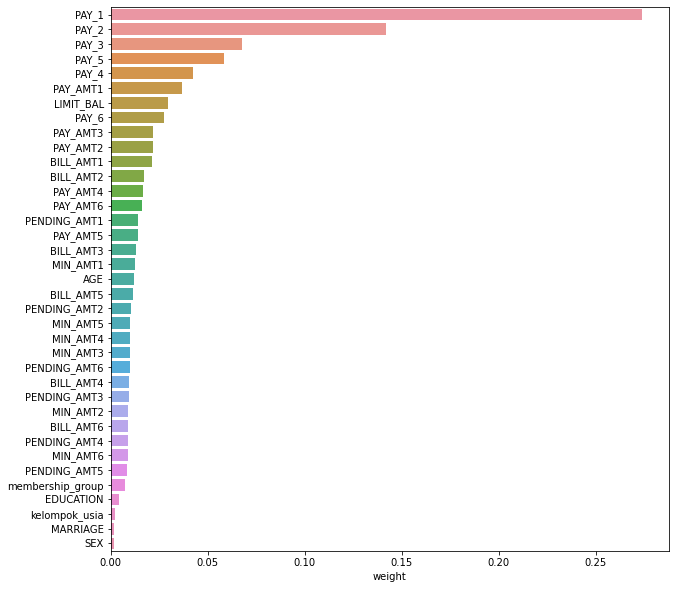

In [ ]:
importance_features = pd.DataFrame(rf_model_RS.best_estimator_.feature_importances_ , index=xtrain.columns, columns=['weight']).sort_values(by=['weight'], ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(y=importance_features.index, x=importance_features['weight'])
plt.show()

In [ ]:
importance_features.weight.sum()

1.0000000000000002

In [ ]:
importance_features

,weight
PAY_1,0.273986
PAY_2,0.141997
PAY_3,0.067549
PAY_5,0.058380
PAY_4,0.042367
PAY_AMT1,0.036760
LIMIT_BAL,0.029308
PAY_6,0.027610
PAY_AMT3,0.021859
PAY_AMT2,0.021816


#### **Experiment Penggunaan (n) Fitur Terbaik**

In [ ]:
def use_n_features(n):

  best_features = importance_features.head(n).index

  print('\nuse {} best features : {}\n'.format(n, best_features.to_list()))

  X_train_best, X_test_best = xtrain[best_features], xtest[best_features]

  model = rf_model_RS.fit(X_train_best, ytrain.values.ravel())
  ypredict = model.predict(X_test_best)

  eval_classification(model, X_train_best, ytrain, X_test_best, ytest)

In [ ]:
# for i in range(1,20):
#   use_n_features(i)
use_n_features(8)


use 8 best features : ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_5', 'PAY_4', 'PAY_AMT1', 'LIMIT_BAL', 'PAY_6']


Precision (Test Set): 0.65

Recall (Test Set): 0.37

F1-Score (Test Set): 0.47

AUC (test-proba): 0.77
AUC (train-proba): 0.80


# **XGBOOST**

In [ ]:
from xgboost import XGBClassifier, XGBRegressor
xg = XGBClassifier(random_state=42)
xg.fit(xtrain, ytrain.values.ravel())
eval_classification(xg, xtrain, ytrain, xtest, ytest)


Precision (Test Set): 0.65

Recall (Test Set): 0.37

F1-Score (Test Set): 0.47

AUC (test-proba): 0.78
AUC (train-proba): 0.82


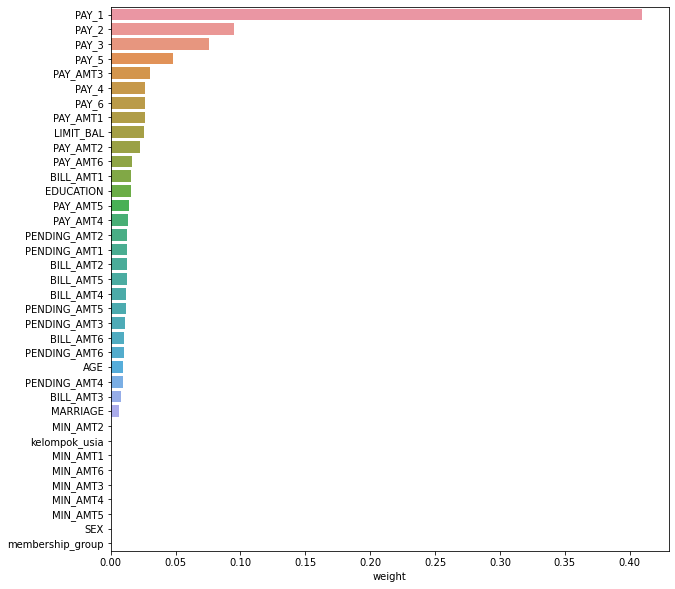

In [ ]:
importance_features = pd.DataFrame(xg.feature_importances_ , index=xtrain.columns, columns=['weight']).sort_values(by=['weight'], ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(y=importance_features.index, x=importance_features['weight'])
plt.show()

**Tuning Hyper-Parameter**

In [ ]:
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, scoring = scoring, n_jobs=-1, random_state=111)
xg_tuned.fit(xtrain,ytrain.values.ravel())
eval_classification(xg_tuned, xtrain, ytrain, xtest, ytest)


Precision (Test Set): 0.64

Recall (Test Set): 0.36

F1-Score (Test Set): 0.46

AUC (test-proba): 0.78
AUC (train-proba): 0.91


# **AdaBoost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(random_state=42)
ab.fit(xtrain,ytrain.values.ravel())

eval_classification(ab, xtrain, ytrain, xtest, ytest)


Precision (Test Set): 0.67

Recall (Test Set): 0.34

F1-Score (Test Set): 0.45

AUC (test-proba): 0.78
AUC (train-proba): 0.79


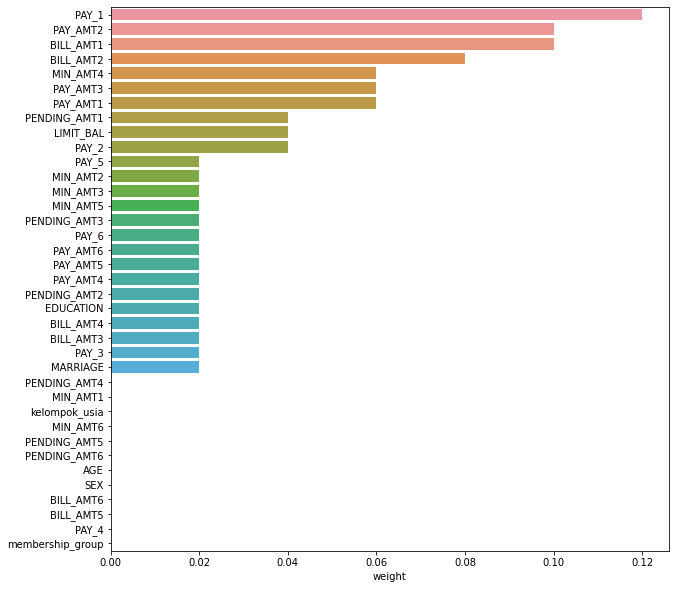

In [ ]:
importance_features = pd.DataFrame(ab.feature_importances_ , index=xtrain.columns, columns=['weight']).sort_values(by=['weight'], ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(y=importance_features.index, x=importance_features['weight'])
plt.show()

In [ ]:
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 2000)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 200)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )


ab = AdaBoostClassifier(random_state=42)
ab_tuned = RandomizedSearchCV(ab, hyperparameters, cv=5, scoring = scoring, n_jobs=-1, random_state=111)
ab_tuned.fit(xtrain,ytrain.values.ravel())
eval_classification(ab_tuned, xtrain, ytrain, xtest, ytest)


Precision (Test Set): 0.67

Recall (Test Set): 0.34

F1-Score (Test Set): 0.45

AUC (test-proba): 0.78
AUC (train-proba): 0.79
